# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor

2024-03-03 17:10:55.032727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 17:10:55.032845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 17:10:55.173570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Loading</p>
</div>


In [2]:
data=pd.read_csv('/kaggle/input/real-estate-california/RealEstate_California.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Preprocessing Starts</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35389 non-null  int64  
 1   id                  35389 non-null  object 
 2   stateId             35389 non-null  int64  
 3   countyId            35389 non-null  int64  
 4   cityId              35389 non-null  int64  
 5   country             35389 non-null  object 
 6   datePostedString    35386 non-null  object 
 7   is_bankOwned        35389 non-null  int64  
 8   is_forAuction       35389 non-null  int64  
 9   event               35100 non-null  object 
 10  time                35100 non-null  float64
 11  price               35389 non-null  float64
 12  pricePerSquareFoot  35389 non-null  float64
 13  city                35389 non-null  object 
 14  state               35389 non-null  object 
 15  yearBuilt           35389 non-null  int64  
 16  stre

In [4]:
data=data[['stateId',	'countyId',	'cityId',	'datePostedString',	'is_bankOwned'	,'is_forAuction',	'event',	'time',	'price',	'pricePerSquareFoot',	'yearBuilt',	'zipcode'	,'longitude',	'latitude',	'hasBadGeocode',	'currency',	'livingArea',	'livingAreaValue',	'lotAreaUnits'	,'bathrooms',	'bedrooms',	'buildingArea',	'parking',	'garageSpaces',	'hasGarage',	'levels',	'pool',	'spa',	'isNewConstruction',	'hasPetsAllowed',	'homeType']]
data=data.groupby('event').get_group('Listed for sale')
data=data.groupby('lotAreaUnits').get_group('sqft').drop(['lotAreaUnits'],axis=1)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Time Feature</p>
</div>


<Axes: xlabel='time', ylabel='price'>

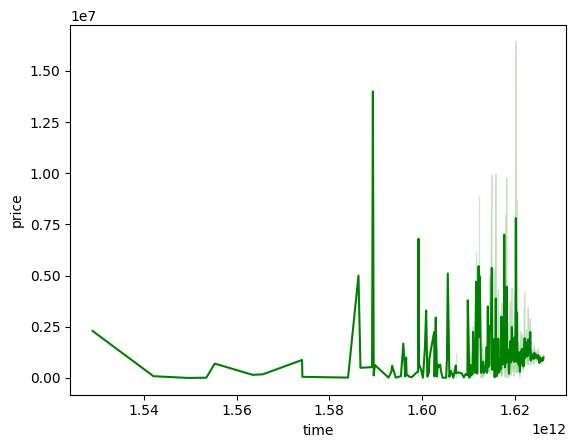

In [5]:
sb.lineplot(data=data,x='time',y='price',color='g')

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Transformation</p>
</div>


In [6]:
data['datePostedString']=pd.to_datetime(data['datePostedString'],format='%Y-%m-%d')

In [7]:
data['datePostedString'].apply(lambda x : x.year).unique()

array([2021, 2020, 2019, 2016])

In [8]:
data['month']=data['datePostedString'].apply(lambda x : x.month)
data['year']=data['datePostedString'].apply(lambda x : x.year)


In [9]:
data.drop(['datePostedString','event'],axis=1,inplace=True)

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>some of the features such as pricePerSquareFoot , livingArea , livingAreaValue , buildingArea , levels have missing values in the form of numerical value '0'</strong></li>
    </ul>
</div>



In [10]:
df1=data[['pricePerSquareFoot','livingArea','livingAreaValue','buildingArea']].replace({0:np.nan})
for i in df1.columns:
    data[i]=df1[i]

In [11]:
data.levels.value_counts()

levels
0                                      6511
One                                    4561
Two                                    3010
One Story                               496
Two Story                               407
Three Or More                           336
Multi/Split                             195
One Story-One                            85
Three or More Stories                    70
Two Story-Two                            53
One-Two                                  36
Tri-Level                                29
Three or More Stories-Three Or More      24
Two-Multi/Split                          18
2                                        14
Four                                     12
Two Story-One                             8
Other                                     6
Three                                     6
Two Story-Three Or More                   5
Two-Three Or More                         5
Three Or More-Multi/Split                 5
Three or More Stories-Two

In [12]:
value=data.levels.replace({'One':1,'0':0,'Two':2,'Two Story':2,"One Story":1,'Three Or More':3})
data.levels=value
selected_index=value[value.astype(str).str.isnumeric()].index
data=data.loc[selected_index,:]
data['levels']=data['levels'].astype('int')

* Building Area has lots of null value, so we drop it
* Living Area and Living Area Values are redundant features so we drop one of them

In [13]:
data.drop(['buildingArea','livingAreaValue'],axis=1,inplace=True)

In [14]:
data.livingArea=data.livingArea.fillna(data.livingArea.mean())
data.pricePerSquareFoot=data.pricePerSquareFoot.fillna(data.pricePerSquareFoot.mean())

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Prices Per Year</p>
</div>


<Axes: xlabel='year', ylabel='price'>

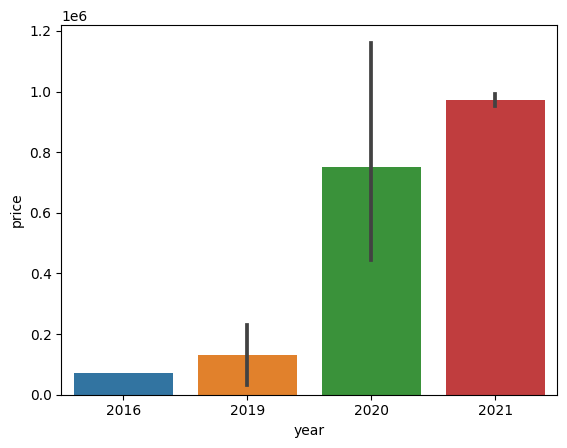

In [15]:
sb.barplot(data[['year','price']],x='year',y='price')

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Prices Per Months</p>
</div>


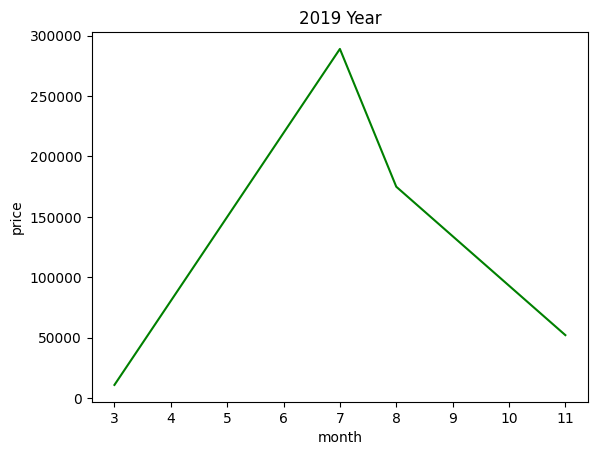

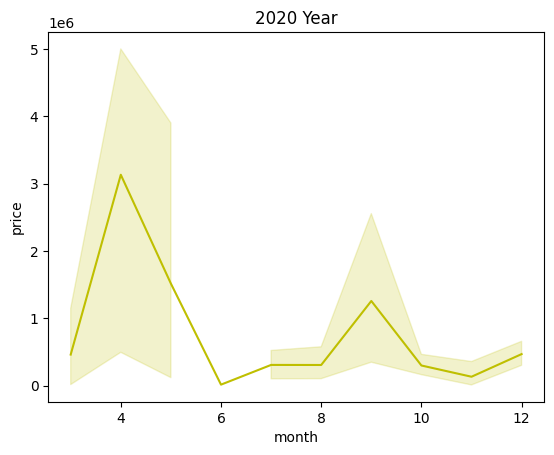

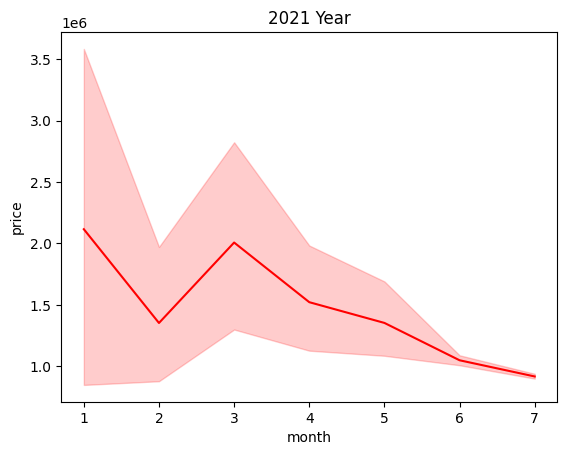

In [16]:
for i in [(2019,'g'),(2020,'y'),(2021,'r')]:
    df2=data.groupby('year').get_group(i[0])
    sb.lineplot(data=df2,x='month',y='price',color=i[1])
    plt.title(f'{i[0]} Year')
    plt.show()

* It Show the prices are increasing over time
* For this case we have the 'time' feature in our dataset so we can drop month and year from our dataset

In [17]:
data.drop(['month','year'],axis=1,inplace=True)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Levels Feature</p>
</div>


<Axes: xlabel='homeType', ylabel='price'>

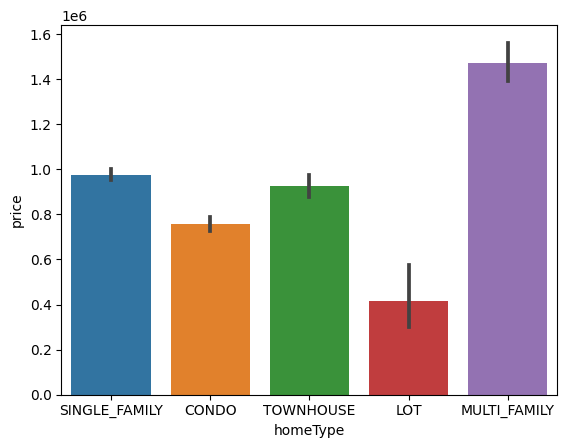

In [18]:
sb.barplot(data[['homeType','price']],x='homeType',y='price')

* so the order can be found out is Multi_Family > Single_family > Town_house > Condo > lot

In [19]:
data.homeType.unique()

array(['SINGLE_FAMILY', 'CONDO', 'TOWNHOUSE', 'LOT', 'MULTI_FAMILY'],
      dtype=object)

In [20]:
encoder=OrdinalEncoder(categories=[['MULTI_FAMILY','SINGLE_FAMILY','TOWNHOUSE','CONDO','LOT']])


In [21]:
data['homeType']=encoder.fit_transform(data[['homeType']])

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Latitude and Longitude Feature</p>
</div>


<Axes: xlabel='longitude', ylabel='latitude'>

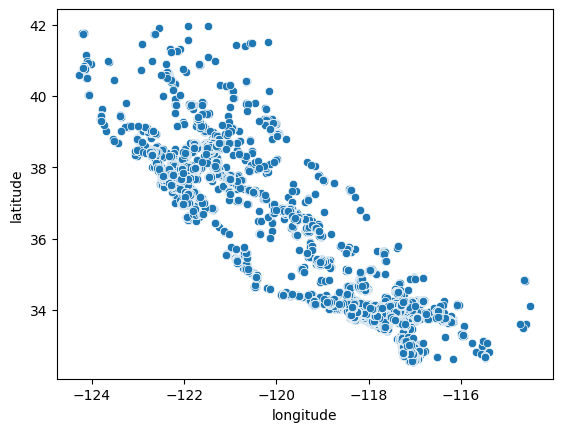

In [22]:
sb.scatterplot(data=data[['longitude','latitude']],x='longitude',y='latitude')

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Kmeans Approach</p>
</div>


In [23]:
df3=data[['latitude','longitude']]

In [24]:
list1=[]
for i in range(1,10):
    km=KMeans(i)
    km.fit(df3)
    list1.append(km.inertia_)

<Axes: >

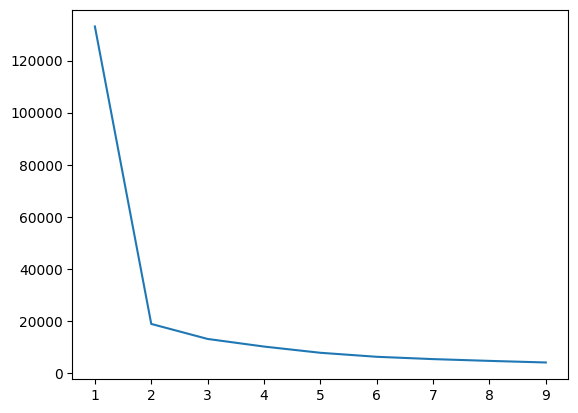

In [25]:
sb.lineplot(x=range(1,10),y=list1)

In [26]:
km=KMeans(2)

In [27]:
df3['region']=data['region']=km.fit_predict(df3)
data.drop(['longitude','latitude'],axis=1,inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

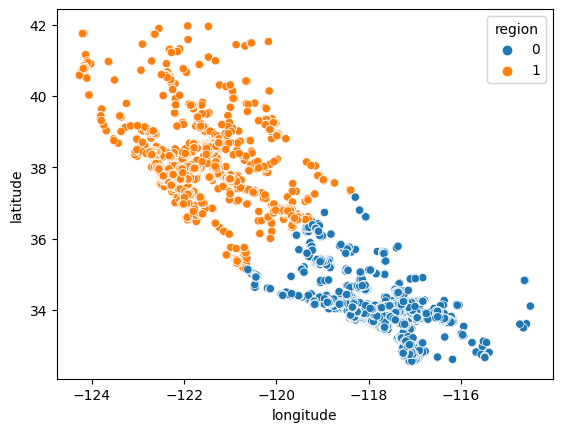

In [28]:
sb.scatterplot(data=df3,x='longitude',y='latitude',hue='region')

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">CityId Feature</p>
</div>


<Axes: xlabel='cityId', ylabel='Count'>

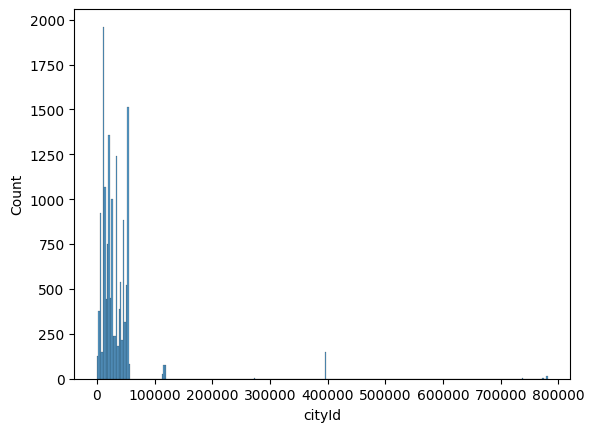

In [29]:
sb.histplot(data['cityId'])

In [30]:
index=np.where(data['cityId']<100000)
data=data.query('cityId<100000')

<Axes: xlabel='cityId', ylabel='Count'>

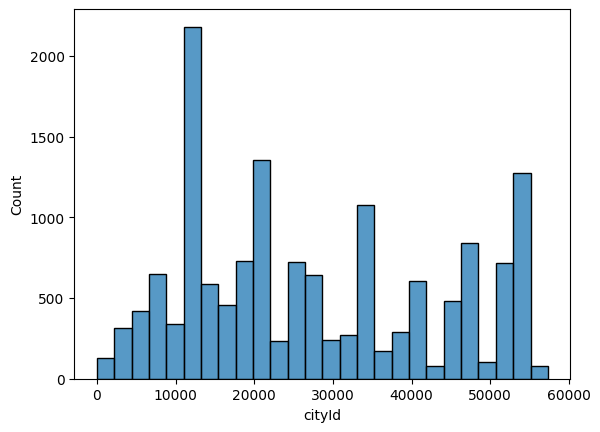

In [31]:
sb.histplot(data['cityId'])

In [32]:
bins=[x for x in range(0,60001,10000)]
data['cityId']=pd.cut(data['cityId'],bins=bins)
city_data=pd.get_dummies(data['cityId'],prefix='cityId').replace({False:0,True:1})
data=data.join(city_data).drop('cityId',axis=1)
data.countyId.nunique()

14797

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">CountyId Feature</p>
</div>


<Axes: xlabel='countyId', ylabel='Count'>

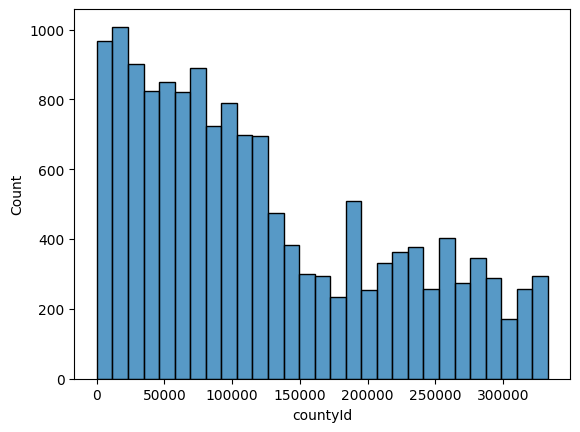

In [33]:
sb.histplot(data['countyId'])

In [34]:
bins=[x for x in range(0,300001,10000)]
data['countyId']=pd.cut(data['countyId'],bins=bins)
county_data=pd.get_dummies(data['countyId'],prefix='countyId').replace({False:0,True:1})
data=data.join(county_data).drop('countyId',axis=1)

In [35]:
data.drop('stateId',axis=1,inplace=True)
data.drop('zipcode',axis=1,inplace=True)
data.drop('currency',axis=1,inplace=True)

In [36]:
data=data.loc[np.sqrt(data['price'])<4000]

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Separating Data</p>
</div>


In [37]:
ydata=np.sqrt(data.price)
xdata=data.drop('price',axis=1)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Scaling Xdata Features</p>
</div>


In [38]:
scaler=('scale',StandardScaler(),['time','pricePerSquareFoot','livingArea'])
col=ColumnTransformer([scaler])

In [39]:
newdata=col.fit_transform(xdata)
xdata.reset_index(drop=True,inplace=True)
xdata.drop(['time','pricePerSquareFoot','livingArea'],axis=1,inplace=True)
df=pd.DataFrame(newdata,columns=['time','pricePerSquareFoot','livingArea'])
xdata=xdata.join(df)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Splitting Data</p>
</div>


In [40]:
xtra,xtest,ytra,ytest=train_test_split(xdata,ydata,test_size=0.2)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Model Training With Validation</p>

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Tensorflow Deep Learning Model</p>
</div>


In [41]:
model=tf.keras.Sequential()

In [42]:
input_size=xtra.shape[1]
output_size=1


In [43]:
model.add(tf.keras.layers.Dense(input_size,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mse',optimizer='adam')
#callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=6)
model.fit(xtra,ytra,validation_data=(xtest,ytest),epochs=200,batch_size=500)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 837321.7500 - val_loss: 148893.7656
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 156372.9531 - val_loss: 142870.8438
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 137855.0000 - val_loss: 140870.1094
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139742.7188 - val_loss: 134998.9688
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 134704.8281 - val_loss: 126728.2734
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 126255.1484 - val_loss: 122397.8750
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 124752.6094 - val_loss: 121363.8359
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 128528.7344 - val_loss: 121557.0000
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 124245.8516 - val_loss: 120181.3125
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 123231.5781 - val_loss: 119790.1797
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

In [44]:
losses=model.history.history

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Results</p>
</div>


<Axes: >

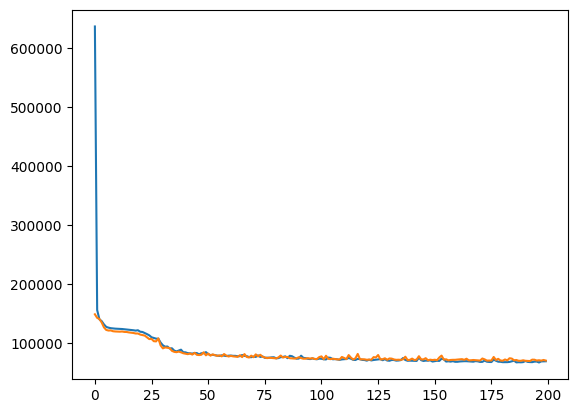

In [45]:
sb.lineplot(losses['loss'])
sb.lineplot(losses['val_loss'])

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Adding Dropout Layers</p>
</div>


In [46]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(input_size,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(32,activation='relu'))
model2.add(tf.keras.layers.Dense(1))
model2.compile(loss='mse',optimizer='adam')
#callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=6)
model2.fit(xtra,ytra,validation_data=(xtest,ytest),batch_size=200,epochs=200)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 312698.4688 - val_loss: 222891.6094
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168350.7812 - val_loss: 266144.8750
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156811.6094 - val_loss: 300264.5312
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149004.6250 - val_loss: 307944.7812
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 148398.8594 - val_loss: 294655.7812
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149104.6562 - val_loss: 297658.2188
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140119.3438 - val_loss: 304496.8125
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 138493.9375 - val_loss: 315957.0000
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 136392.0625 - val_loss: 300006.4062
Epoch 10/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140152.6406 - val_loss: 289605.8125
Epoch 11/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [47]:
losses=model.history.history

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Results</p>
</div>


<Axes: >

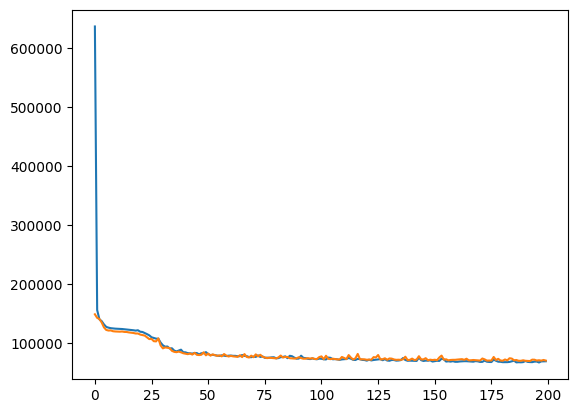

In [48]:
sb.lineplot(losses['loss'])
sb.lineplot(losses['val_loss'])

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Traditional Machine Learning Models</p>
</div>


In [49]:
model1=LinearRegression()
model2=SVR()
model3=xgb.XGBRegressor()
model4=KNeighborsRegressor()
model5=DecisionTreeRegressor()
model6=BaggingRegressor()
model7=RandomForestRegressor()
model8=AdaBoostRegressor()

In [50]:
xtra=xtra.values
xtest=xtest.values
ytra=ytra.values
ytest=ytest.values

In [51]:
model1.fit(xtra,ytra)
model2.fit(xtra,ytra)
model3.fit(xtra,ytra)
model4.fit(xtra,ytra)
model5.fit(xtra,ytra)
model6.fit(xtra,ytra)
model7.fit(xtra,ytra)
model8.fit(xtra,ytra)

AdaBoostRegressor()

In [52]:
model1_score=model1.score(xtest,ytest)
model2_score=model2.score(xtest,ytest)
model3_score=model3.score(xtest,ytest)
model4_score=model4.score(xtest,ytest)
model5_score=model5.score(xtest,ytest)
model6_score=model6.score(xtest,ytest)
model7_score=model7.score(xtest,ytest)
model8_score=model8.score(xtest,ytest)


In [53]:
scores=[model1_score,model2_score,model3_score,model4_score,model5_score,model6_score,model7_score,model8_score]
models=['LinearRegression','SVR',
'XGBRegressor',
'KNeighborsRegressor',
'DecisionTreeRegressor',
'BaggingRegressor',
'RandomForestRegressor',
'AdaBoostRegressor']

In [54]:
pd.DataFrame(data=dict(models=models,scores=scores))

,models,scores
0,LinearRegression,0.417823
1,SVR,0.001656
2,XGBRegressor,0.917054
3,KNeighborsRegressor,0.484858
4,DecisionTreeRegressor,0.879618
5,BaggingRegressor,0.924586
6,RandomForestRegressor,0.931932
7,AdaBoostRegressor,0.430895


<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>XGBRegressor , DecisionTreeRegressor , BaggingRegressor , RandomForestRegressor performs well</strong></li>
    </ul>
</div>


<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Thank u for visiting</p>
